In [1]:
import numpy as np
import math
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

__1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод__

In [2]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])


In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [4]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [5]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

-4.163336342344337e-17 0.9999999999999999


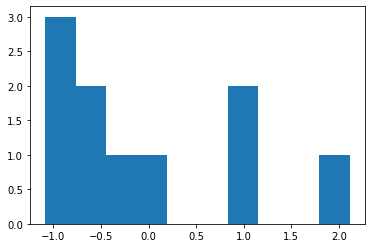

In [6]:
ind = 2
print(np.mean(X_st[:, ind]), np.std(X_st[:, ind]))
plt.hist(X_st[:, ind])
plt.show()

In [7]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [8]:
W = np.random.randn(X.shape[1])
W

array([ 0.76792029, -0.90133523, -0.14320053,  0.25501334])

In [9]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]

    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)

        dQ = 2 / n * X.T @ (y_pred - y)  # градиент функции ошибки
        dReg = reg * W# (np.sum(W ** 2, axis=0) ** 0.5)  # градиент регуляризации

        W -= eta * (dQ + dReg)

        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')

    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [10]:
gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-1, reg=1e-4)

Iter: 0, weights: [11.99264964  1.39923435  1.78483945  2.93005861], error 3268.348462985173
Iter: 500, weights: [56.49717514  6.30232145 -0.35425992  6.56979994], error 24.904627734520837
Iter: 1000, weights: [56.49717514  6.30234588 -0.35437787  6.5698973 ], error 24.904627646691644
Iter: 1500, weights: [56.49717514  6.30234588 -0.35437787  6.5698973 ], error 24.904627646688823
Iter: 2000, weights: [56.49717514  6.30234588 -0.35437787  6.5698973 ], error 24.904627646688848
Iter: 2500, weights: [56.49717514  6.30234588 -0.35437787  6.5698973 ], error 24.904627646688848
Iter: 3000, weights: [56.49717514  6.30234588 -0.35437787  6.5698973 ], error 24.904627646688848
Iter: 3500, weights: [56.49717514  6.30234588 -0.35437787  6.5698973 ], error 24.904627646688848
Iter: 4000, weights: [56.49717514  6.30234588 -0.35437787  6.5698973 ], error 24.904627646688848
Iter: 4500, weights: [56.49717514  6.30234588 -0.35437787  6.5698973 ], error 24.904627646688848
Final MSE: 24.904627646688848


array([56.49717514,  6.30234588, -0.35437787,  6.5698973 ])

__2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.__

In [11]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]

    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)

        dQ = 2 / n * X.T @ (y_pred - y)  # градиент функции ошибки

        dReg = reg * np.sign(W) #np.sum(np.abs(W), axis=0)  # градиент регуляризации

        W -= eta * (dQ + dReg)

        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')

    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [12]:
gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-1, reg=1e-2)

Iter: 0, weights: [11.26310338  1.57234408  2.97430602  0.85452153], error 3406.559052810136
Iter: 500, weights: [56.495       6.28283623 -0.29670396  6.52794695], error 24.905262780818937
Iter: 1000, weights: [56.495       6.2828664  -0.2968496   6.52806717], error 24.90525975491639
Iter: 1500, weights: [56.495       6.2828664  -0.29684961  6.52806717], error 24.905259754816107
Iter: 2000, weights: [56.495       6.2828664  -0.29684961  6.52806717], error 24.905259754816093
Iter: 2500, weights: [56.495       6.2828664  -0.29684961  6.52806717], error 24.905259754816097
Iter: 3000, weights: [56.495       6.2828664  -0.29684961  6.52806717], error 24.905259754816093
Iter: 3500, weights: [56.495       6.2828664  -0.29684961  6.52806717], error 24.905259754816093
Iter: 4000, weights: [56.495       6.2828664  -0.29684961  6.52806717], error 24.905259754816097
Iter: 4500, weights: [56.495       6.2828664  -0.29684961  6.52806717], error 24.905259754816093
Final MSE: 24.905259754816093


array([56.495     ,  6.2828664 , -0.29684961,  6.52806717])

__2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?__

In [13]:
def standard_scale(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std

In [14]:
def min_max_scale(X):
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

In [15]:
X_norm = X.copy().astype('float64')
X_norm = min_max_scale(X_norm[:, 1:])
X_norm.min(axis=0), X_norm.max(axis=0)

(array([0., 0., 0.]), array([1., 1., 1.]))

In [16]:
X_norm.mean(axis=0), X_norm.std(axis=0)

(array([0.3       , 0.33870968, 0.35      ]),
 array([0.28284271, 0.31283671, 0.39051248]))

In [17]:
X_norm_st = standard_scale(X_norm)
X_norm_st.min(axis=0), X_norm_st.max(axis=0)

(array([-1.06066017, -1.08270439, -0.89625816]),
 array([2.47487373, 2.11385144, 1.66447944]))

In [18]:
X_norm_st.mean(axis=0), X_norm_st.std(axis=0)

(array([-1.49880108e-16, -6.86950496e-17,  8.32667268e-17]),
 array([1., 1., 1.]))

__3. *Сгенерируйте датасет при помощи sklearn.datasets.make_regression и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.__

In [19]:
from sklearn import datasets

X, Y, coef = datasets.make_regression(n_samples=100000, n_features=20, n_informative=10, n_targets=1, 
                                      noise=5, coef=True, random_state=2)
display(X, Y, coef)

array([[-0.71760732, -1.09367119, -0.73597009, ..., -0.09194752,
         0.77271648, -0.5294093 ],
       [-0.21856062, -0.43937009,  1.17601766, ..., -0.44205731,
         0.65967443, -0.5364636 ],
       [-0.09232329, -0.04777714,  0.58128624, ..., -0.64041891,
         1.29076796, -0.34530826],
       ...,
       [-0.1724219 ,  1.20477844,  0.77081956, ...,  1.78646758,
        -0.59041036, -0.6747931 ],
       [ 0.93830193, -0.05266006,  1.45767292, ..., -1.01765261,
         0.02393901,  1.37086726],
       [-0.99582701,  1.30720547, -0.04855569, ...,  1.85683052,
        -0.26133944,  0.50888458]])

array([-133.10543687,   44.01778172,   48.98233093, ..., -271.14963388,
        161.66813826,  380.05918834])

array([8.03590530e+00, 9.63394753e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.86058430e+01, 0.00000000e+00, 0.00000000e+00,
       9.61298231e+01, 5.95379955e+01, 0.00000000e+00, 3.30583257e+01,
       3.71965212e+01, 6.59198012e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.78539772e+01, 0.00000000e+00, 7.36381949e+01])

In [20]:
X = standard_scale(X)

In [21]:
np.random.seed(4)
init_W = np.random.randn(X.shape[1])
init_W

array([ 0.05056171,  0.49995133, -0.99590893,  0.69359851, -0.41830152,
       -1.58457724, -0.64770677,  0.59857517,  0.33225003, -1.14747663,
        0.61866969, -0.08798693,  0.4250724 ,  0.33225315, -1.15681626,
        0.35099715, -0.60688728,  1.54697933,  0.72334161,  0.04613557])

In [22]:
# стохастический градиентный спуск

def stohastic_gradient_descent(W, X, Y, iterations, eta=1e-4, size=1):
    n = X.shape[0]
    
    errors = []
    w_list = [W.copy()]
    for i in range(0, iterations):
        
        train_ind = np.random.randint(X.shape[0], size=size)

        y_pred = np.dot(X[train_ind], W)
        W = W - eta * 2 / Y[train_ind].shape[0] * np.dot(X[train_ind].T, y_pred - Y[train_ind])

        error = calc_mse(Y, np.dot(X, W))
        errors.append(error)
        w_list.append(W)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, error {error}')
    
    print(f'Final MSE: {calc_mse(Y, np.dot(X, W))}')
    return W, errors, w_list

In [23]:
# классический  GD
def gradient_descent(W, X, y, iterations, eta=1e-4):
    n = X.shape[0]
    
    errors = []
    w_list = [W.copy()]
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        errors.append(err)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        w_list.append(W.copy())
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, error {err}')
        
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W, errors, w_list

In [24]:
%%time
weights_GD, errors_GD, w_list_GD = gradient_descent(init_W, X, Y, iterations=5000, eta=1e-3)

Iter: 0, error 28238.145558270597
Iter: 500, error 3773.857140475058
Iter: 1000, error 523.5463031642968
Iter: 1500, error 91.40234234740227
Iter: 2000, error 33.905382777624474
Iter: 2500, error 26.24984618250239
Iter: 3000, error 25.229794983175754
Iter: 3500, error 25.0937805690566
Iter: 4000, error 25.075631039130027
Iter: 4500, error 25.073207422322483
Final MSE: 25.07288354458468
Wall time: 42.3 s


In [25]:
np.random.seed(9)
init_W = np.random.randn(X.shape[1])
init_W

array([ 1.10855471e-03, -2.89544069e-01, -1.11606630e+00, -1.28827567e-02,
       -3.78361464e-01, -4.81135363e-01, -1.51733118e+00, -4.90871981e-01,
       -2.40680579e-01, -6.47947460e-01,  6.35891080e-01,  1.74011731e+00,
        2.96682218e-01,  7.07503662e-01,  1.82281576e+00,  4.30769029e-01,
        1.54272963e+00, -9.00721171e-01, -1.37125010e-01,  1.29757901e+00])

In [26]:
%%time
weights_SGD, errors_SGD, w_list_SGD = stohastic_gradient_descent(init_W, X, Y, iterations=5000, eta=1e-3, size=1)

Iter: 0, error 27940.77081989326
Iter: 500, error 3909.816186117472
Iter: 1000, error 706.2521418796898
Iter: 1500, error 120.35629563367924
Iter: 2000, error 39.60425259602933
Iter: 2500, error 28.22301680954602
Iter: 3000, error 25.817348849230516
Iter: 3500, error 25.704226689560503
Iter: 4000, error 25.595371308044225
Iter: 4500, error 25.525400398020874
Final MSE: 25.42803342673532
Wall time: 5.49 s


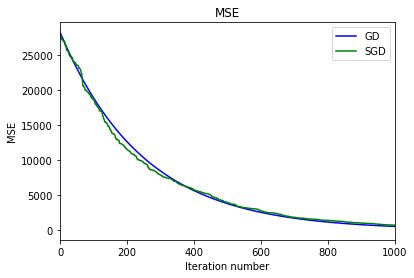

In [27]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors_GD)), errors_GD, color='b', label='GD')
plt.plot(range(len(errors_SGD)), errors_SGD, color='g', label='SGD')

plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.xlim(0, 1000)
plt.legend();

In [28]:
w_list_GD = np.array(w_list_GD)
w_list_SGD = np.array(w_list_SGD)

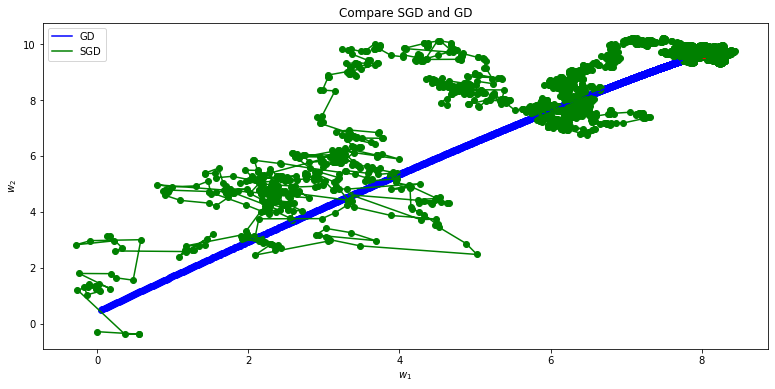

In [29]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Compare SGD and GD')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list_GD[:, 0], w_list_GD[:, 1], color='b')
plt.plot(w_list_GD[:, 0], w_list_GD[:, 1], color='b', label='GD')

plt.scatter(w_list_SGD[:, 0], w_list_SGD[:, 1], color='g')
plt.plot(w_list_SGD[:, 0], w_list_SGD[:, 1], color='g', label='SGD')
plt.scatter(coef[0], coef[1], c='r')

plt.legend()
plt.show()